In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
publico_path = '../extra/notícias/news_sample_1to1000_updated.csv'
observador_path = '../extra/notícias/noticias_observador_fev_a_julho.csv'
medidas_path = '../extra/medidas_governamentais/medidas_governamentais.csv'

In [59]:
#df_publico = pd.read_csv(publico_path, index_col='Unnamed: 0')
#df_observador = pd.read_csv(observador_path, index_col='Unnamed: 0')
df_medidas = pd.read_csv(medidas_path, header=None, names=['data', 'local', 'tipo', 'descricao'])

In [4]:
df_publico.head()

,titulo,descricao,titulo_Mobile,subtitulo,rubricTag,rubrica,tipo,palavraChave,tipoLayout,isOpinion,...,isClubeP,isItemOpinion,isMultipleRubric,socialTitle,isLongForm,isHeadline,wordCount,extra4,partners,props
0,Linha de mil milhões para micro e pequenas emp...,Ministério da Economia diz que a formalização ...,NaN,NaN,NaN,Covid-19,NOTICIA,NaN,MULTIMEDIA_NORMAL,False,...,False,False,False,Covid-19. Linha de mil milhões para micro e pe...,False,False,349,NaN,NaN,NaN
1,Covid-19: Twitter retira vídeo e mensagens de ...,"Segundo o jornal <i>The Washington Post</i>, o...",NaN,NaN,NaN,Coronavírus,NOTICIA,NaN,MULTIMEDIA_NORMAL,False,...,False,False,False,Coronavírus. Covid-19: Twitter retira vídeo e ...,False,False,358,NaN,NaN,NaN
2,Tecnologia portuguesa elimina o novo coronavír...,"A tecnologia pioneira AT MicroProtect, desenvo...",NaN,NaN,NaN,Coronavírus,NOTICIA,NaN,MULTIMEDIA_NORMAL,False,...,False,False,False,Coronavírus. Tecnologia portuguesa elimina o n...,False,False,740,NaN,NaN,NaN
3,"“Não somos super-homens, somos humanos”: os re...",Há de tudo: a algumas pessoas a covid-19 não p...,NaN,NaN,NaN,Coronavírus,NOTICIA,NaN,LONGFORM_NORMAL,False,...,False,False,False,"Coronavírus. “Não somos super-homens, somos hu...",True,False,2108,NOTIFIED,NaN,NaN
4,Dez milhões de euros para as instituições part...,"Da aquisição de máscaras, luvas e viseiras à c...",NaN,NaN,NaN,Covid-19,NOTICIA,NaN,MULTIMEDIA_NORMAL,False,...,False,False,False,Covid-19. Dez milhões de euros para as institu...,False,False,330,NaN,NaN,NaN


In [5]:
df_observador.head()

,Data,Titulo,Desc,Links
0,2020-02-01,Coronavírus. Portugueses ficam 14 dias ...,Os 18 portugueses vindos de Wuhan já aterraram...,https://observador.pt/2020/02/01/aviao-que-vai...
1,2020-02-01,"Wuhan Coronavírus: afinal, qual o risco?",Os coronavírus é uma família de vírus com prov...,https://observador.pt/opiniao/2019-ncov-ou-wuh...
2,2020-02-01,Como o coronavírus afeta fabricantes de...,"Com mais habitantes do que Portugal, Wuhan é u...",https://observador.pt/2020/01/31/como-o-corona...
3,2020-02-01,Centenas são repatriados a partir de Wuhan,Vários países já estão a repatriar os seus cid...,https://observador.pt/programas/atualidade/cen...
4,2020-02-01,Vídeo mostra a origem do coronavírus?,Vídeo que alegadamente mostra um mercado na Ch...,https://observador.pt/factchecks/fact-check-vi...


In [6]:
print('Público:    ', df_publico.shape)
print('Observador: ', df_observador.shape)

Público:     (9670, 42)
Observador:  (28735, 4)


In [7]:
df_publico.columns

Index(['titulo', 'descricao', 'titulo_Mobile', 'subtitulo', 'rubricTag',
       'rubrica', 'tipo', 'palavraChave', 'tipoLayout', 'isOpinion',
       'prioridade', 'isPreview', 'aoMinuto', 'isFeature', 'dataActualizacao',
       'data', 'autores_id', 'autores_nome', 'autores_localizacao',
       'autores_profissaoActual', 'autores_profissaoNaAltura',
       'autores_isExternal', 'autores_contribuicao', 'autores_tipo', 'tags_id',
       'tags_nome', 'tags_isPrincipal', 'tags_isTimeLine',
       'tags_forcaConteudoAberto', 'tags_isForForuns', 'tags_isUsedInForuns',
       'isSponsorContent', 'isClubeP', 'isItemOpinion', 'isMultipleRubric',
       'socialTitle', 'isLongForm', 'isHeadline', 'wordCount', 'extra4',
       'partners', 'props'],
      dtype='object')

In [8]:
df_observador.columns

Index(['Data', 'Titulo', 'Desc', 'Links'], dtype='object')

In [9]:
df_publico['data'] = pd.to_datetime(df_publico['data']).dt.date.astype('datetime64')

In [10]:
df_publico['data']

0      2020-07-28
1      2020-07-28
2      2020-07-28
3      2020-07-28
4      2020-07-28
          ...    
9665   2020-01-22
9666   2020-01-22
9667   2020-01-22
9668   2020-01-21
9669   2020-01-21
Name: data, Length: 9670, dtype: datetime64[ns]

In [11]:
df_observador = df_observador.append({'Data': '2020-01-01',
                                      'Titulo': None,
                                      'Desc': None,
                                      'Links': None},
                                     ignore_index=True)

In [15]:
df_observador['Data'] = pd.to_datetime(df_observador['Data']).dt.date.astype('datetime64')

In [16]:
df_publico['jornal'] = 'publico'

In [17]:
df_observador['jornal'] = 'observador'

In [18]:
df_publico.columns

Index(['titulo', 'descricao', 'titulo_Mobile', 'subtitulo', 'rubricTag',
       'rubrica', 'tipo', 'palavraChave', 'tipoLayout', 'isOpinion',
       'prioridade', 'isPreview', 'aoMinuto', 'isFeature', 'dataActualizacao',
       'data', 'autores_id', 'autores_nome', 'autores_localizacao',
       'autores_profissaoActual', 'autores_profissaoNaAltura',
       'autores_isExternal', 'autores_contribuicao', 'autores_tipo', 'tags_id',
       'tags_nome', 'tags_isPrincipal', 'tags_isTimeLine',
       'tags_forcaConteudoAberto', 'tags_isForForuns', 'tags_isUsedInForuns',
       'isSponsorContent', 'isClubeP', 'isItemOpinion', 'isMultipleRubric',
       'socialTitle', 'isLongForm', 'isHeadline', 'wordCount', 'extra4',
       'partners', 'props', 'jornal'],
      dtype='object')

In [19]:
df_observador.columns

Index(['Data', 'Titulo', 'Desc', 'Links', 'jornal'], dtype='object')

In [20]:
df_observador.rename({'Data': 'data', 'Titulo': 'titulo', 'Desc': 'descricao'}, axis = 1, inplace=True)

In [21]:
df_noticias = pd.concat([df_publico[['data', 'titulo', 'descricao', 'jornal']],
                         df_observador[['data', 'titulo', 'descricao', 'jornal']]])

In [22]:
df_noticias_vis = df_noticias[df_noticias['data'] < '2020-07-01']

In [23]:
df_noticias.shape

(38406, 4)

In [24]:
df_noticias_vis.shape

(37596, 4)

In [25]:
df_total_jornal = df_noticias_vis.groupby(by='jornal').count()

In [26]:
df_total_jornal_mes = df_noticias_vis.groupby(by = ['jornal', pd.Grouper(key='data', freq='M')]).count()

In [48]:
df_total_jornal_semana = df_noticias_vis.groupby(by = ['jornal', pd.Grouper(key='data', freq='W')]).count()

In [50]:
df_total_jornal_dia = df_noticias_vis.groupby(by = ['jornal', pd.Grouper(key='data', freq='D')]).count()

In [27]:
df_noticias[df_noticias['data'] == '2020-02-01'].groupby(by='jornal').count()

,data,titulo,descricao
jornal,,,
observador,65,65,65
publico,3,3,3


In [32]:
df_total_jornal_mes.div(df_total_jornal, level='jornal')['titulo']

jornal      data      
observador  2020-01-31    0.000000
            2020-02-29    0.118531
            2020-03-31    0.213189
            2020-04-30    0.229024
            2020-05-31    0.245867
            2020-06-30    0.193388
publico     2020-01-31    0.008916
            2020-02-29    0.026749
            2020-03-31    0.280361
            2020-04-30    0.321670
            2020-05-31    0.240181
            2020-06-30    0.122122
Name: titulo, dtype: float64

In [95]:
df_total_jornal

,data,titulo,descricao
jornal,,,
observador,28736,28735,28735
publico,8860,8860,8506


In [191]:
df_total_jornal_mes_reset = df_total_jornal_mes.reset_index()

In [173]:
def norm_count_by_group(df, group_col, count_col, df_total):
    df_result = df
    df_result['count_norm'] = 0
    for value in set(df[group_col]):
        ind = df[df[group_col] == value].index
        temp = (df.loc[ind, count_col]/df_total.loc[value, count_col]).to_list()
        df_result.loc[ind, 'count_norm'] = temp
    return df_result

In [179]:
df_total_jornal_mes_reset = norm_count_by_group(df_total_jornal_mes_reset, 'jornal', 'titulo', df_total_jornal)

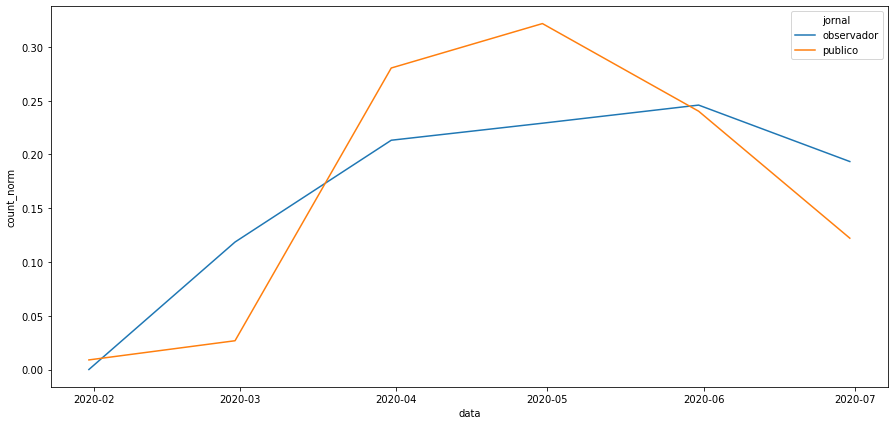

In [177]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_total_jornal_mes_reset, x='data', y='count_norm', hue='jornal')

In [180]:
df_total_jornal_semana_reset = norm_count_by_group(df_total_jornal_semana.reset_index(), 'jornal', 'titulo', df_total_jornal)

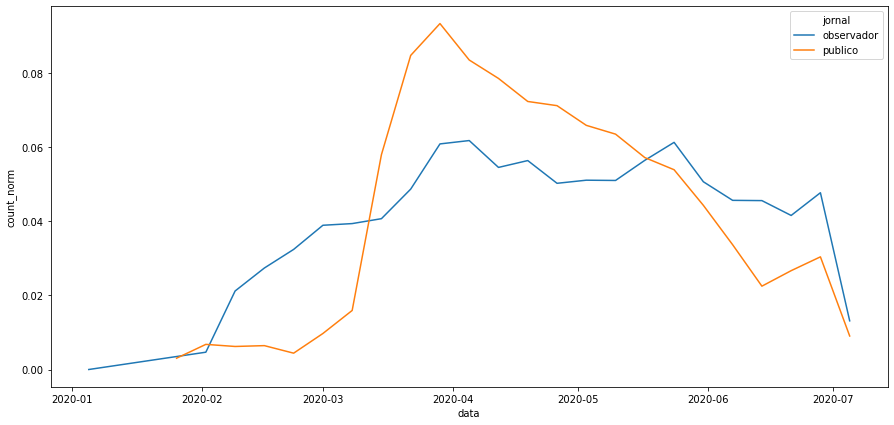

In [185]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_total_jornal_semana_reset, x='data', y='count_norm', hue='jornal')

In [188]:
df_total_jornal_dia_reset = norm_count_by_group(df_total_jornal_dia.reset_index(), 'jornal', 'titulo', df_total_jornal)

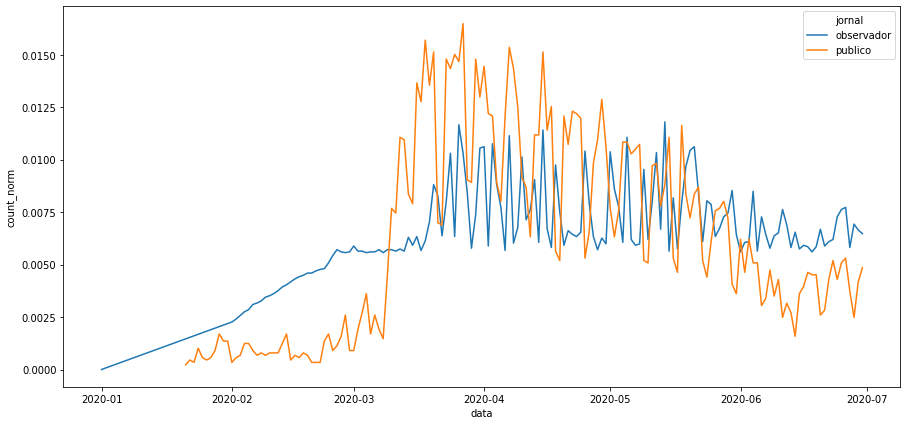

In [189]:
fig = plt.figure(figsize=(15,7))
sns.lineplot(data=df_total_jornal_dia_reset, x='data', y='count_norm', hue='jornal', figure=fig)

In [195]:
df_total_mes_reset = df_total_jornal_mes_reset.groupby(by='data').sum().reset_index()

In [202]:
df_total_mes_reset['count_norm'] = df_total_mes_reset['titulo']/df_total_jornal.sum()[1]

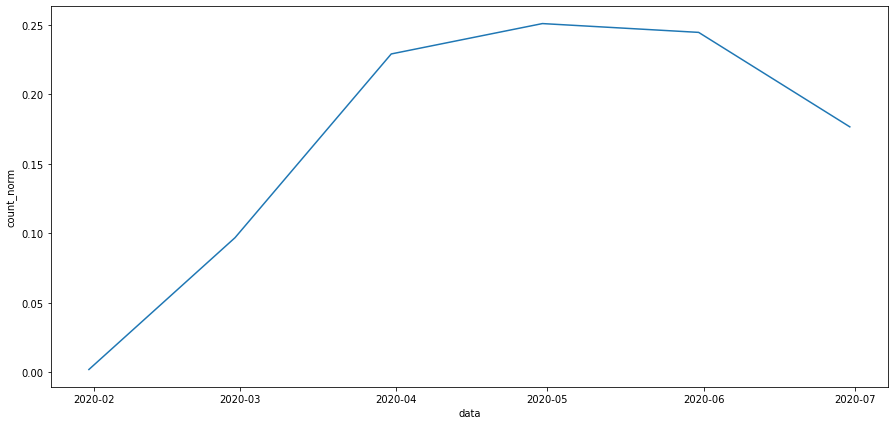

In [204]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_total_mes_reset, x='data', y='count_norm')

# TOTAL!!!

In [73]:
df_medidas['tipo'].value_counts()

Medidas            57
Desconfinamento    47
Calamidade         10
Emergência          3
Alerta              2
Contigência         1
Name: tipo, dtype: int64

In [80]:
df_medidas.head()

,data,local,tipo,descricao
0,08-03-2020,Portugal,Medidas,Suspensão de Visitas a estabelecimentos prisio...
1,08-03-2020,Norte,Medidas,"ICBAS, FFUP E escola em Felgueiras Encerradas"
2,12-03-2020,Portugal,Medidas,Restrição de funcionamento de discotecas e est...
3,12-03-2020,Portugal,Medidas,Suspensão de visitas a lares
4,12-03-2020,Portugal,Medidas,Limite de pessoas em centros comerciais e serv...


In [79]:
df_temp = df_medidas[(df_medidas['tipo'] != 'Medidas') &
           (df_medidas['tipo'] != 'Desconfinamento') &
           (df_medidas['local'] == 'Portugal')]

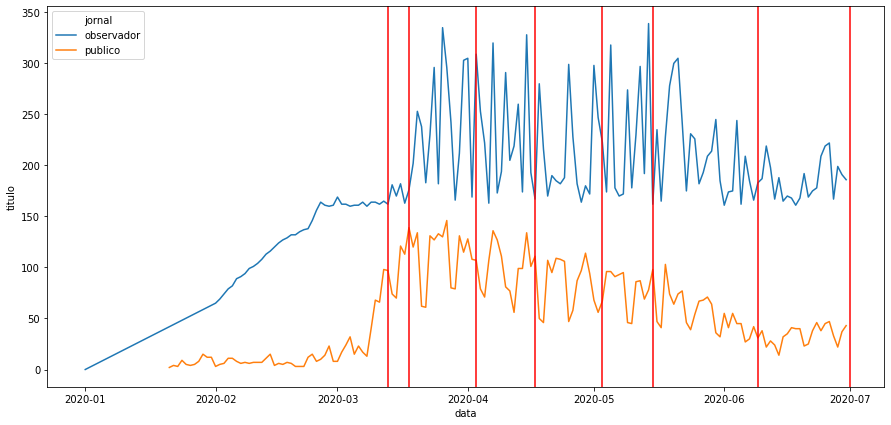

In [82]:
fig = plt.figure(figsize=(15,7))
sns.lineplot(data=df_total_jornal_dia.reset_index(), x='data', y='titulo', hue='jornal', figure=fig)
for row_id, row_values in df_temp.iterrows():
    plt.axvline(x=dt.datetime.strptime(row_values['data'], '%d-%m-%Y'), color='red')

In [90]:
for key, row in df_observador[df_observador['data'] == '2020-03-01'].iterrows():
    print(key, row['titulo']+ "\n")

3406        DGS deve "informar", não causar "pânico e medo"

3407   16h. Quem esteve com Sepúlveda deve ligar SNS24

3408   14h. Caso suspeito na Madeira deu negativo

3409  Coronavírus: como está a reagir o setor cultural?

3410        Luis Sepúlveda internado com coronavírus

3411        Passageira com sintomas levada para o Curry Cabral - como aconteceu

3412  Impacto económico do coronavírus vai ser diferente /premium

3413  Uma tempestade aproxima-se da Europa /premium

3414   18h. Número de mortos em Itália sobe para 29

3415  O impacto do Covid-19 na indústria tecnológica

3416  A pele negra é resistente ao coronavírus?

3417  O caso italiano: os que passam o vírus sem saber

3418        Coronavírus. Correntes d'Escritas deixa avisos - como aconteceu

3419  A coisa que mais importa sobre o coronavirus

3420  Festival Coronavírus: seis curtíssimas metragens /premium

3421  Coronavírus. Conselhos para estar protegido

3422        Graça Freitas: 1 milhão de doentes no pior cenário
